<a href="https://colab.research.google.com/github/NehaKumari500092077/Bird-Species-Identification/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0, 0.5, 'Amplitude')

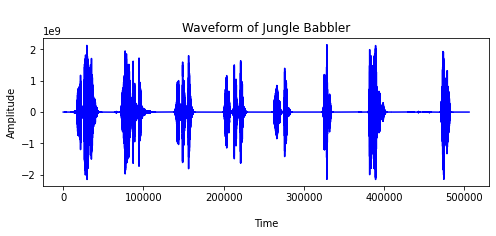

In [42]:
import matplotlib.pyplot as plot
from scipy.io import wavfile

samplingFrequency, data = wavfile.read('/content/Babbler1.wav')
plot.figure(figsize=(8,6))
plot.subplot(211, facecolor='white')
plot.title('\nWaveform of Jungle Babbler')
plot.plot(data, color='blue')

plot.xlabel('\nTime')
plot.ylabel('Amplitude')

[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..


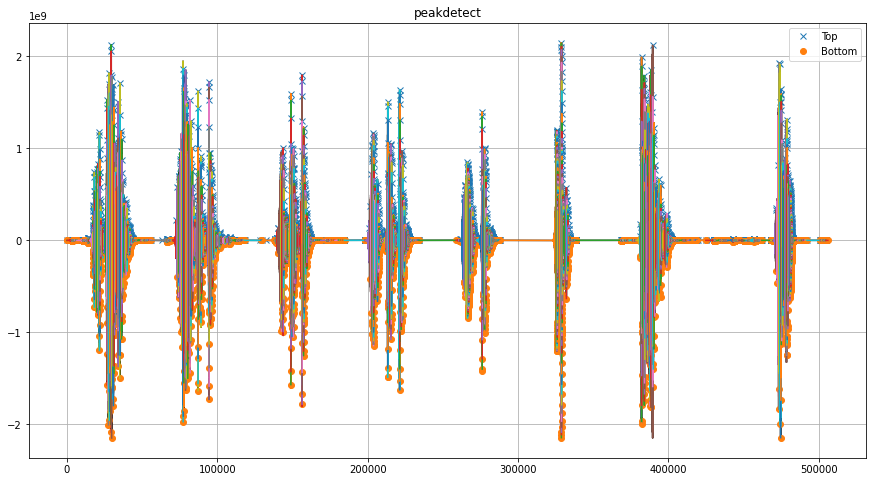

min [     0    117   3024 ... 504646 504801 506119]
max [   230   3060   3134 ... 504578 504714 504878]


<Figure size 432x288 with 0 Axes>

In [50]:
# Load library
import numpy as np
from findpeaks import findpeaks
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

samplerate, data = read('/content/Babbler1.wav')

# Initialize
fp = findpeaks(method='peakdetect')
results = fp.fit(data)
# Plot
fp.plot1d()
df_interp = results["df"]
min_peaks = df_interp["x"].loc[df_interp["valley"]].values
max_peaks = df_interp["x"].loc[df_interp["peak"]].values
print("min", min_peaks)
print("max", max_peaks)


[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..


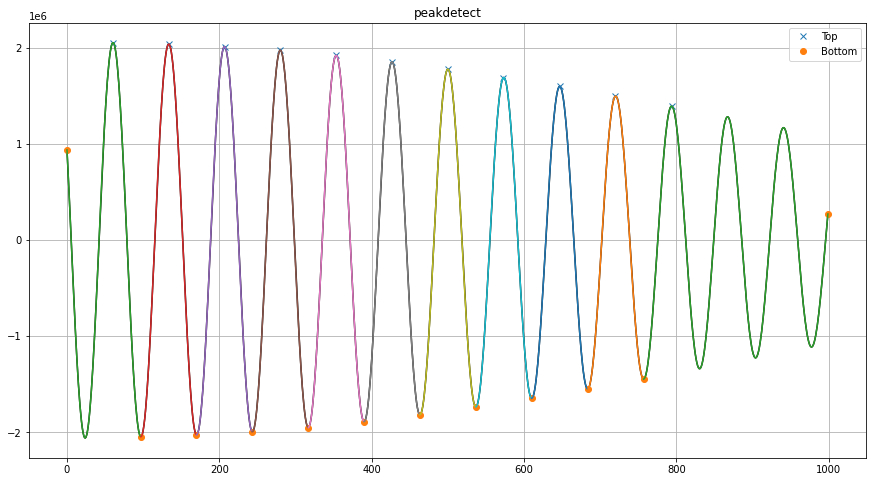

       x        y  labx  valley   peak
0      0   937424   1.0    True  False
60    60  2052669   1.0   False   True
97    97 -2046215   2.0    True  False
134  134  2037842   2.0   False   True
170  170 -2027051   3.0    True  False
207  207  2012593   3.0   False   True
243  243 -1994150   4.0    True  False
280  280  1976154   4.0   False   True
317  317 -1951104   5.0    True  False
353  353  1920456   5.0   False   True
390  390 -1888508   6.0    True  False
427  427  1853956   6.0   False   True
463  463 -1816852   7.0    True  False
500  500  1778427   7.0   False   True
537  537 -1735382   8.0    True  False
573  573  1690556   8.0   False   True
610  610 -1646463   9.0    True  False
647  647  1599249   9.0   False   True
684  684 -1548497  10.0    True  False
720  720  1497460  10.0   False   True
757  757 -1446315  11.0    True  False
794  794  1393222  11.0   False   True
999  999   271150  11.0    True  False


In [71]:
results = fp.fit(data[3000:4000])
fp.plot1d()
plt.show()
df_interp = results["df"]
min_peaks = df_interp["x"].loc[df_interp["valley"]].values
max_peaks = df_interp["x"].loc[df_interp["peak"]].values
df_interp = df_interp[(df_interp["valley"] == True) | (df_interp["peak"] == True)]
print(df_interp)

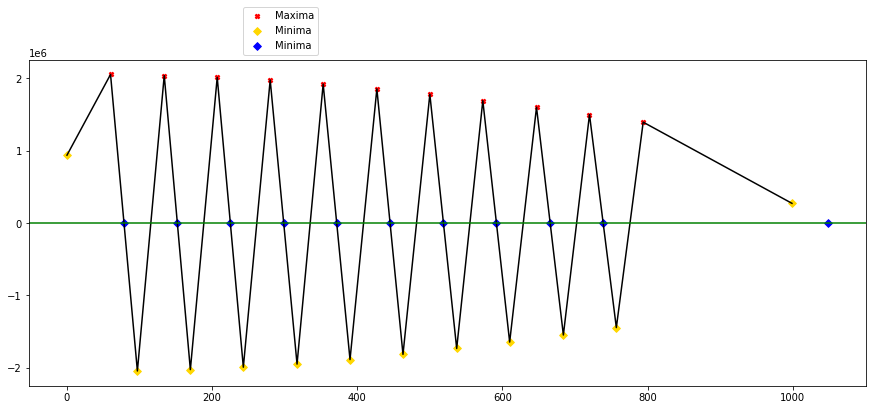

In [103]:
data1 = df_interp[df_interp["valley"] == True]
data2 = df_interp[df_interp["peak"] == True]

fig = plt.figure(figsize=(15,6))
ax = fig.subplots()
ax.plot(df_interp['x'], df_interp['y'], color="black")
# s stands for marker size and marker stands for marker style"
ax.scatter(data2['x'], data2['y'], color = 'r', s = 20, marker = 'X', label = 'Maxima')
ax.scatter(data1['x'], data1['y'], color = 'gold', s = 30, marker = 'D', label = 'Minima')
ax.scatter(x_value, y_value, color = 'blue', s = 30, marker = 'D', label = 'Minima')
ax.axhline(y=0, color='green')
ax.legend(loc='best', bbox_to_anchor=(0.25, 1))
#ax.grid(color='blue', linestyle='-', linewidth=0.25)
plt.show()

In [102]:

from scipy.stats import linregress
slope = list()
intercept = list()
x_value = list()
y_value = list()
for i in range(1, len(df_interp), 2):
    if(i < len(df_interp)-1):
      print(df_interp.iloc[i, 0], df_interp.iloc[i, 1])
      print(df_interp.iloc[i+1, 0], df_interp.iloc[i+1, 1])
      x1 = df_interp.iloc[i, 0]
      y1 = df_interp.iloc[i, 1]
      x2 = df_interp.iloc[i+1, 0]
      y2 = df_interp.iloc[i+1, 1]
      slope1, intercept1, r_value, p_value, std_err = linregress([x1,x2],[y1,y2])
      slope.append(slope1)
      intercept.append(intercept1)
      #at y = 0, value of x will be

      x_value.append(float(-intercept1/slope1))
      y_value.append(0)
      print("slope: ", slope , " Intercept: ", intercept, "x_value: ", x_value)





60 2052669
97 -2046215
slope:  [-110780.64864864865]  Intercept:  [8699507.918918919] x_value:  [78.52912963626197]
134 2037842
170 -2027051
slope:  [-110780.64864864865, -112913.69444444444]  Intercept:  [8699507.918918919, 17168277.055555556] x_value:  [78.52912963626197, 152.04778428362076]
207 2012593
243 -1994150
slope:  [-110780.64864864865, -112913.69444444444, -111298.41666666667]  Intercept:  [8699507.918918919, 17168277.055555556, 25051365.25] x_value:  [78.52912963626197, 152.04778428362076, 225.0828538291575]
280 1976154
317 -1951104
slope:  [-110780.64864864865, -112913.69444444444, -111298.41666666667, -106142.1081081081]  Intercept:  [8699507.918918919, 17168277.055555556, 25051365.25, 31695944.27027027] x_value:  [78.52912963626197, 152.04778428362076, 225.0828538291575, 298.6180021786193]
353 1920456
390 -1888508
slope:  [-110780.64864864865, -112913.69444444444, -111298.41666666667, -106142.1081081081, -102944.97297297297]  Intercept:  [8699507.918918919, 17168277.055

In [44]:
pip install findpeaks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
results = fp.fit(data[3000:4000])
fp.plot1d()
plt.show()
df_interp = results["df"]
min_peaks = df_interp["x"].loc[df_interp["valley"]].values
max_peaks = df_interp["x"].loc[df_interp["peak"]].values
df_interp = df_interp[(df_interp["valley"] == True) | (df_interp["peak"] == True)]
print(df_interp)